# Polynomial features using [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) class

In [45]:
from sklearn import datasets

housing_data, housing_target = datasets.load_boston(return_X_y = True)
#print(housing_data)
#print(housing_target)


In [6]:
housing_data.shape

(506, 13)

In [21]:
from sklearn.model_selection import train_test_split

housig_train, housig_test, housig_train_t, housig_test_t  =  \
train_test_split(housing_data, housing_target, test_size=0.1, random_state=1010)

## Let's train regular regression as a benchmark

In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize=True)

In [23]:
lr.fit(housig_train, housig_train_t)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [24]:
from sklearn.metrics import mean_squared_error

print("Mean squared error of a linear moderl: %.2f" % 
      mean_squared_error(housig_test_t, lr.predict(housig_test)))
score = lr.score(housig_test, housig_test_t) #r2_score
print("Linear Regression variance score: %.2f" % score)

Mean squared error of a linear moderl: 27.38
Linear Regression variance score: 0.78


## Let's generate polynomial features

In [11]:
from sklearn.preprocessing import PolynomialFeatures

pt = PolynomialFeatures(2, ) # interaction_only=True)

In [12]:
housig_train_poly = pt.fit_transform(housig_train)
housig_train_poly.shape

(455, 105)

In [13]:
housig_test_poly = pt.fit_transform(housig_test)

In [14]:
lr_poly = LinearRegression(normalize = True)

In [15]:
lr_poly.fit(housig_train_poly, housig_train_t)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [16]:
print("Mean squared error of a linear moderl using polynomial features: %.2f" % 
      mean_squared_error(housig_test_t, lr_poly.predict(housig_test_poly)))
score = lr_poly.score(housig_test_poly, housig_test_t) #r2_score
print("Linear Regression variance score using polynomial features: %.2f" % score)

Mean squared error of a linear moderl using polynomial features: 16.37
Linear Regression variance score using polynomial features: 0.87


In [17]:
#print(lr_poly.coef_)

MSE (test): 27.377664753228565
MSE (train): 21.349730011661823

MSE (test): 16.37406749937483
MSE (train): 5.6425142523808995

MSE (test): 745803.7716537825
MSE (train): 6.3875768464577815e-18

MSE (test): 1911.8818692156706
MSE (train): 1.8442868542651085e-23

MSE (test): 1335.8251455824968
MSE (train): 9.451683853368553e-24



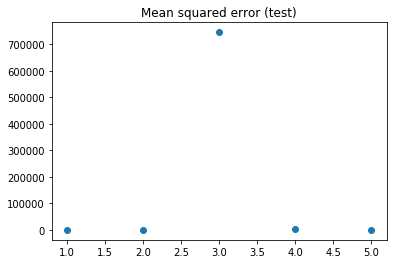

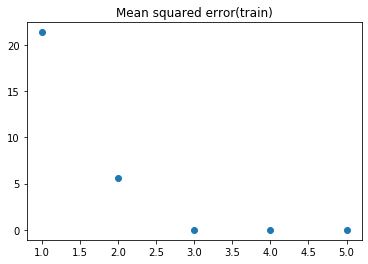

In [93]:
# ToDo: plot how quality of solution (mean squared error) change 
# with change in polynomial features. Plot mean squared error in terms of a polynomial degree for _training_ and 
# _testing_ data. How one can check if model is overfitted to train data? (train maleje, test rosnie)
import matplotlib.pyplot as plt

x,msearr,scorearr,msetrarr=[],[],[],[]

housing_data, housing_target = datasets.load_boston(return_X_y = True)
housig_train, housig_test, housig_train_t, housig_test_t  = train_test_split(housing_data, housing_target, test_size=0.1, random_state=1010)


for i in range (1,6):
    
    pt = PolynomialFeatures(degree=i)
    housig_train_poly = pt.fit_transform(housig_train)
    housig_train_poly.shape
    housig_test_poly = pt.fit_transform(housig_test)
    lr_poly = LinearRegression(normalize = True)
    lr_poly.fit(housig_train_poly, housig_train_t)
    
    mse = mean_squared_error(housig_test_t, lr_poly.predict(housig_test_poly))
    print("MSE (test):", mse)
    mse_tr = mean_squared_error(housig_train_t, lr_poly.predict(housig_train_poly))
    print("MSE (train):", mse_tr)
    
#     score = lr_poly.score(housig_test_poly, housig_test_t)
#     print("Linear Regression variance score using polynomial features:", score)
    print()
    x.append(i)
    msearr.append(mse)
    scorearr.append(score)
    msetrarr.append(mse_tr)
#     plt.plot(lr_poly.predict(housig_test_poly))
#     plt.plot(housig_test_t, color="r")
#     plt.show()

# print(msearr)
# print(scorearr)

plt.plot(x,msearr,'o')
plt.title("Mean squared error (test)")
plt.show()

plt.plot(x,msetrarr,'o')
plt.title("Mean squared error(train)")
plt.show()

# plt.plot(x,scorearr,'o')
# plt.title("Score")
# plt.show()




    
    



### Feature ranking with recursive feature elimination with [RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In [86]:
from sklearn.feature_selection import RFE

sel_ = RFE(estimator=LinearRegression(normalize=False), n_features_to_select=60)
sel_.fit(housig_train_poly, housig_train_t)

print(sel_.support_)
print(sel_.ranking_)


In [ ]:
print("Mean squared error of a linear moderl using _selected_ polynomial features: %.2f" % 
      mean_squared_error(housig_test_t, sel_.predict(housig_test_poly)))
score = sel_.score(housig_test_poly, housig_test_t) #r2_score
print("Linear Regression variance score using _selected_ polynomial features: %.2f" % score)

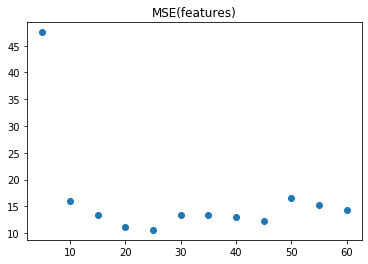

In [95]:
# ToDo: plot how quality of solution (mean squared error) change 
# with change in number of features selected using recursive feature elimination.
# Generate a polynominal features with the degree of 3 and check the quality of solution 
# (by polotting mean squared error) for [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60] features

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(5,60, 12)

msearr,scorearr=[],[]

housing_data, housing_target = datasets.load_boston(return_X_y = True)
housig_train, housig_test, housig_train_t, housig_test_t  = train_test_split(housing_data, housing_target, test_size=0.1, random_state=1010)

pt = PolynomialFeatures(3, )
housig_train_poly = pt.fit_transform(housig_train)
housig_train_poly.shape
housig_test_poly = pt.fit_transform(housig_test)
lr_poly = LinearRegression(normalize = True)
lr_poly.fit(housig_train_poly, housig_train_t)
mse = mean_squared_error(housig_test_t, lr_poly.predict(housig_test_poly))
# print("Mean squared error of a linear moderl using polynomial features:", mse)
score = lr_poly.score(housig_test_poly, housig_test_t)
# print("Linear Regression variance score using polynomial features:", score)
# print()


#-----------------------------------------


from sklearn.feature_selection import RFE

for i in range(5,61,5):
    
#     print("features_to_select: ", i)
    
    sel_ = RFE(estimator=LinearRegression(normalize=False), n_features_to_select=i)
    sel_.fit(housig_train_poly, housig_train_t)
    mse = mean_squared_error(housig_test_t, sel_.predict(housig_test_poly))
    
#     print("Mean squared error:", mse)
    msearr.append(mse)
    
    score = sel_.score(housig_test_poly, housig_test_t) 
#     print("Score:", score)
    scorearr.append(score)
    
#     plt.plot(sel_.predict(housig_test_poly), color="b")
#     plt.plot(housig_test_t, color="r")
#     plt.show()
    
#     print("----------------------------------")
#     print()
    
    
plt.plot(x,msearr, 'o')
plt.title("MSE(features)" )
plt.show()

# plt.plot(x,scorearr, 'o')
# plt.title("Score")
# plt.show()